In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [15]:
data.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [18]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lab_enc = LabelEncoder()

In [21]:
df = lab_enc.fit_transform(data['rank'])

In [22]:
data['rank'] = df

In [24]:
df1 = lab_enc.fit_transform(data['discipline'])

In [25]:
data['discipline'] = df1

In [26]:
df2 = lab_enc.fit_transform(data['sex'])

In [27]:
data['sex'] = df2

In [28]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [29]:
data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:xlabel='sex', ylabel='salary'>

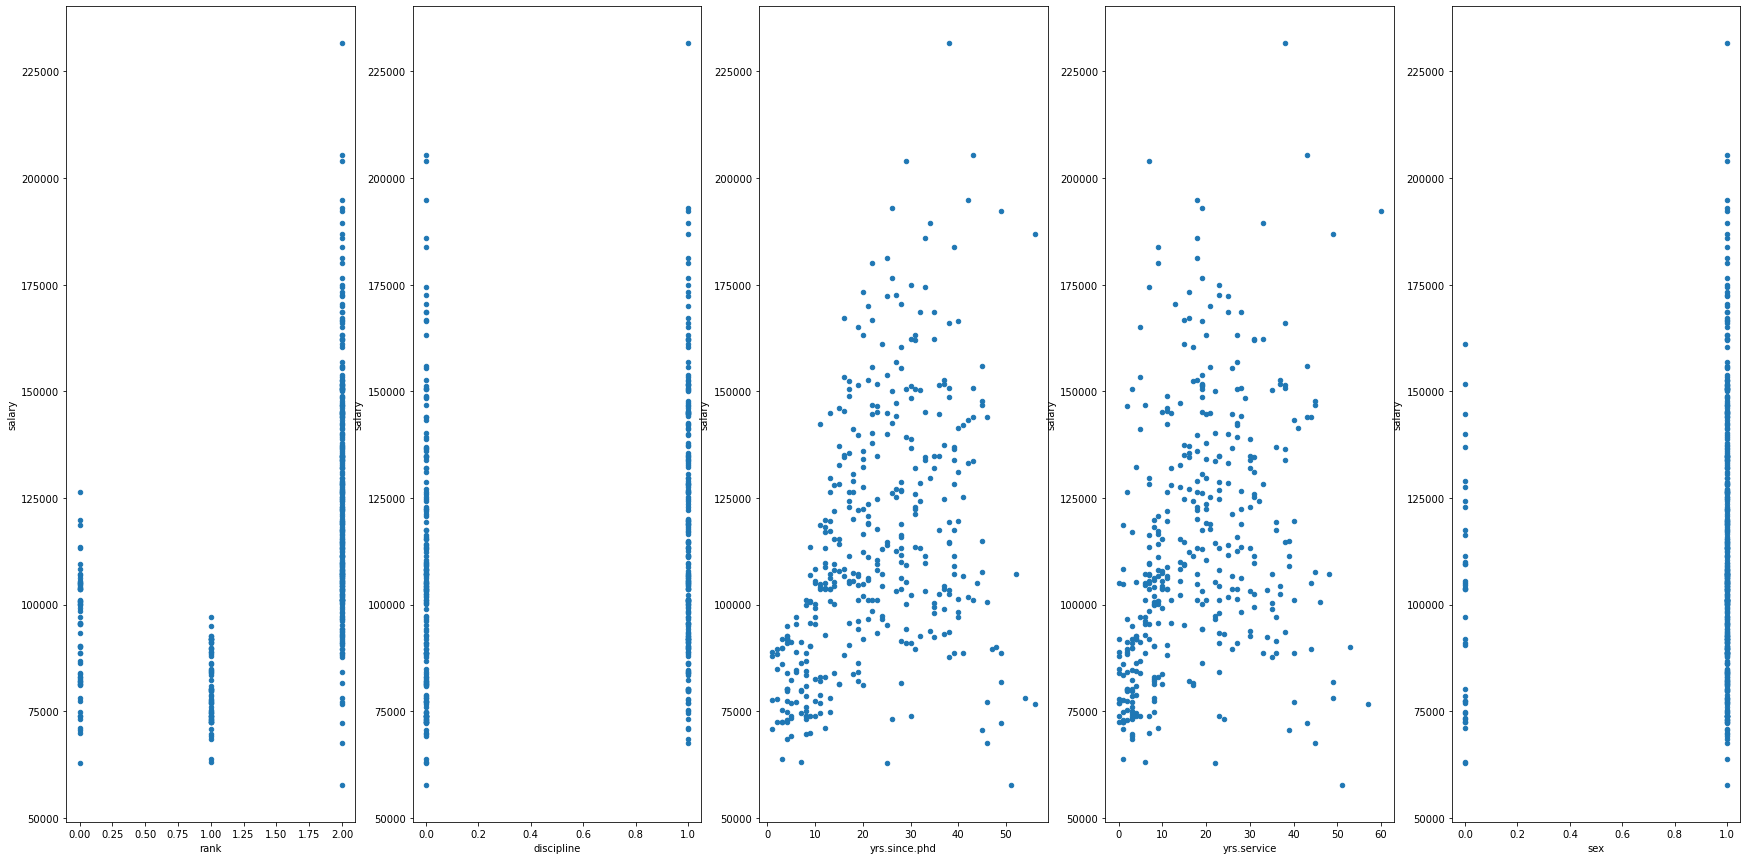

In [37]:
fig,axs = plt.subplots(1,5)
data.plot(kind = 'scatter',x = 'rank',y = 'salary',ax = axs[0],figsize = (30,15))
data.plot(kind = 'scatter', x = 'discipline',y = 'salary',ax = axs[1])
data.plot(kind = 'scatter',x = 'yrs.since.phd',y = 'salary',ax = axs[2])
data.plot(kind = 'scatter',x = 'yrs.service',y = 'salary',ax = axs[3])
data.plot(kind = 'scatter', x = 'sex', y = 'salary',ax = axs[4])

In [39]:
x = data.drop(columns = ['salary'])
y = data.salary

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr =  LinearRegression()

In [42]:
lr.fit(x,y)

LinearRegression()

In [44]:
import statsmodels.formula.api as smf

In [45]:
lr = smf.ols(formula = 'salary~rank+discipline',data = data).fit()
lr.rsquared

0.313457770867984

In [48]:
lr = smf.ols(formula = 'salary~rank+discipline+sex',data = data).fit()
lr.rsquared

0.31793994573228757